# Set 1 - Diabetes

## Decision Tree

In [16]:
def split(name, sampling_technique):
    import numpy as np
    from pandas import read_csv, concat, unique, DataFrame
    import matplotlib.pyplot as plt
    import ds_charts as ds
    from ds_charts import multiple_bar_chart
    from sklearn.model_selection import train_test_split

    dataset = name.copy()

    target = 'readmitted'
    values = {}

    y = dataset.pop(target).values
    X = dataset.values
    labels = unique(y)
    labels.sort()

    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=0)

    train = concat([DataFrame(trnX, columns=dataset.columns), DataFrame(trnY,columns=[target])], axis=1)
    train.to_csv('datasets/' + sampling_technique + '_train.csv', index=False)

    test = concat([DataFrame(tstX, columns=dataset.columns), DataFrame(tstY,columns=[target])], axis=1)
    test.to_csv('datasets/' + sampling_technique + '_test.csv', index=False)
    
    values['Train'] = [len(np.delete(trnY, np.argwhere(trnY!=0))), len(np.delete(trnY, np.argwhere(trnY!=1)))]
    values['Test'] = [len(np.delete(tstY, np.argwhere(tstY!=0))), len(np.delete(tstY, np.argwhere(tstY!=1)))]

    return [trnX, tstX, trnY, tstY]

In [17]:
import pandas as pd
from ds_charts import bar_chart

sampling_technique=['under_sampling', 'over_sampling', 'smote']
dataset=dict()
splitted=dict()

for technique in sampling_technique:
    dataset[technique] = pd.read_csv('datasets/'+technique+'.csv')
    splitted[technique] = split(dataset[technique], technique)

<Figure size 600x450 with 0 Axes>

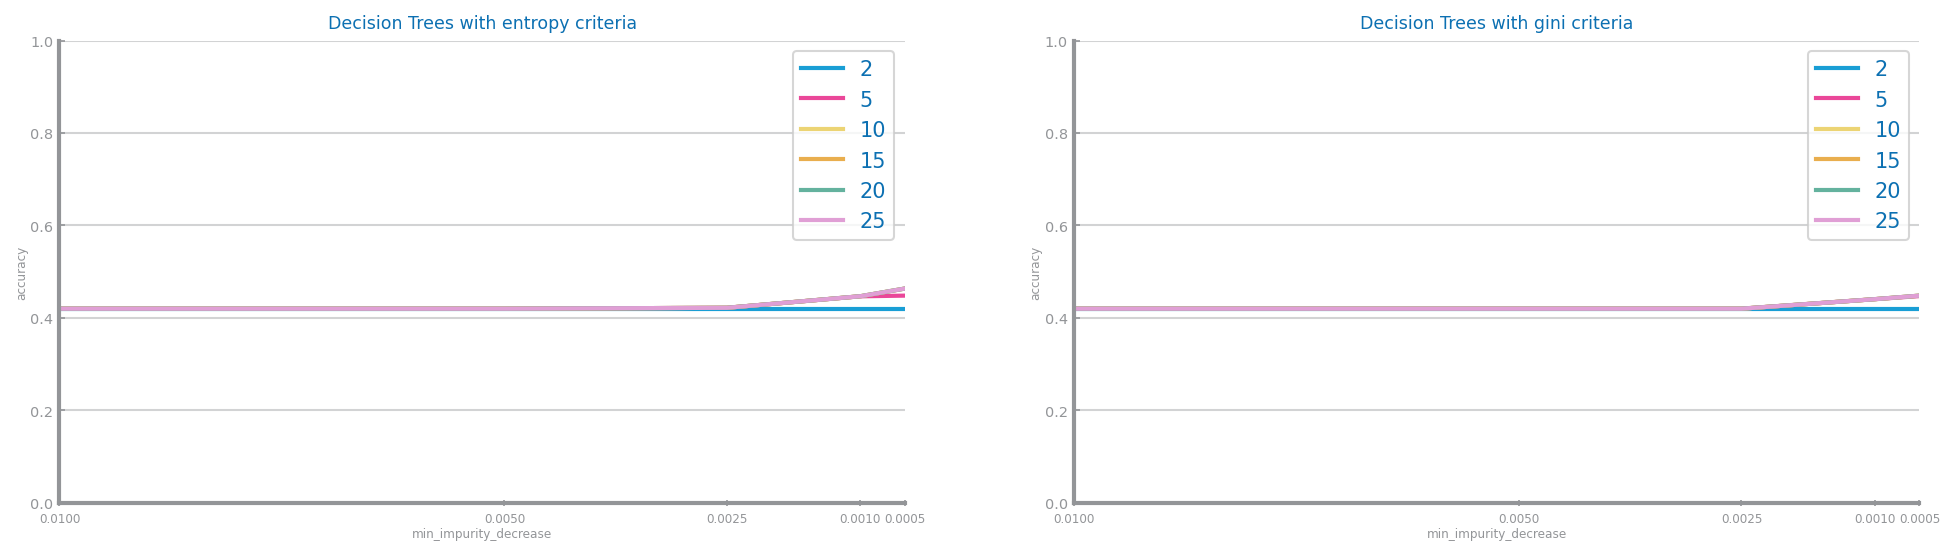

<Figure size 600x450 with 0 Axes>

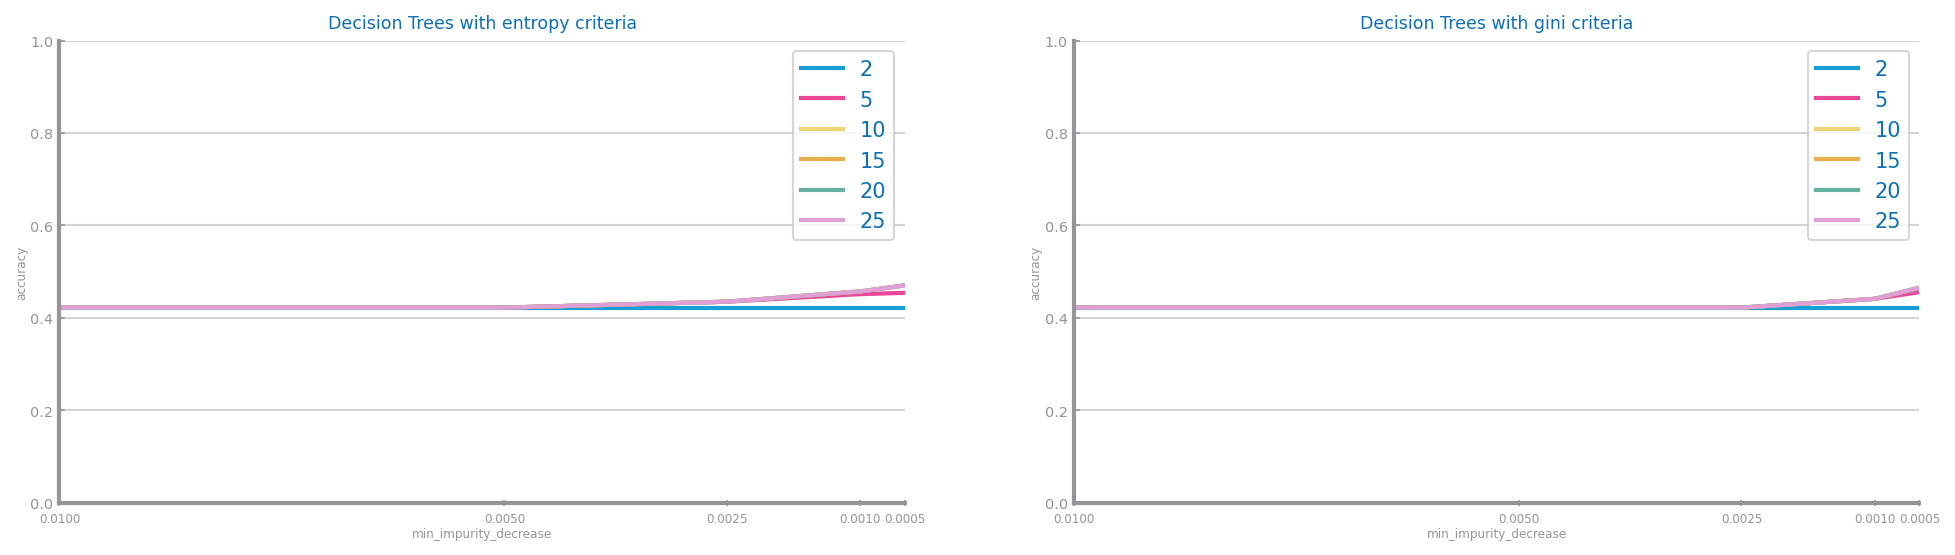

<Figure size 600x450 with 0 Axes>

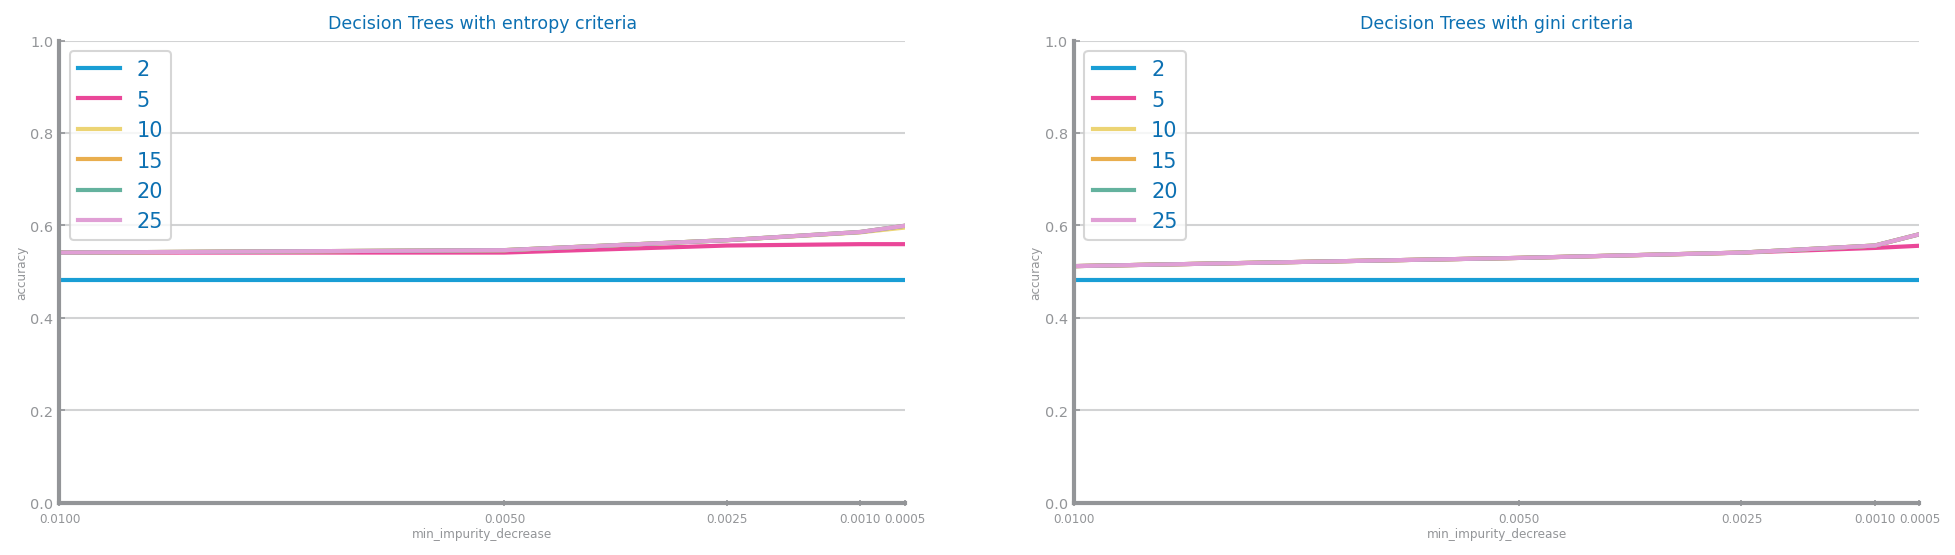

In [18]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.tree import DecisionTreeClassifier
from ds_charts import plot_evaluation_results, multiple_line_chart
from sklearn.metrics import accuracy_score

target = 'readmitted'
for technique in sampling_technique:
    file_tag = 'diabetes_'+technique
    filename = 'datasets/'+technique

    train: DataFrame = read_csv(f'{filename}_train.csv')
    trnY: ndarray = train.pop(target).values
    trnX: ndarray = train.values
    labels = unique(trnY)
    labels.sort()

    test: DataFrame = read_csv(f'{filename}_test.csv')
    tstY: ndarray = test.pop(target).values
    tstX: ndarray = test.values

    min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
    max_depths = [2, 5, 10, 15, 20, 25]
    criteria = ['entropy', 'gini']
    best = ('',  0, 0.0)
    last_best = 0
    best_model = None

    figure()
    fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
    for k in range(len(criteria)):
        f = criteria[k]
        values = {}
        for d in max_depths:
            yvalues = []
            for imp in min_impurity_decrease:
                tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
                tree.fit(trnX, trnY)
                prdY = tree.predict(tstX)
                yvalues.append(accuracy_score(tstY, prdY))
                if yvalues[-1] > last_best:
                    best = (f, d, imp)
                    last_best = yvalues[-1]
                    best_model = tree

            values[d] = yvalues
        multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                               xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)
    savefig(f'images/{file_tag+technique}_dt_study.png')
    show()


In [19]:
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.5f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

Best results achieved with entropy criteria, depth=15 and min_impurity_decrease=0.00050 ==> accuracy=0.60


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.31291 to fit


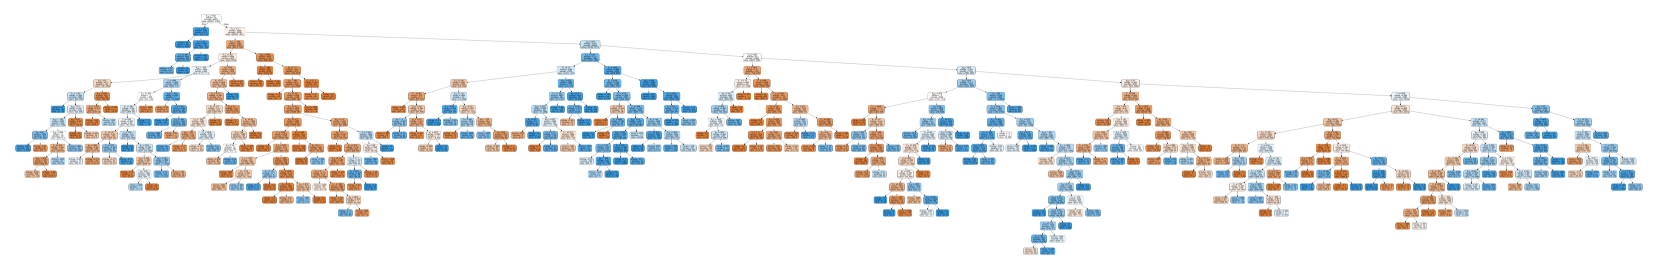

In [21]:
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis

file_tree = 'images/diabetes_dt_best_tree.png'

dot_data = export_graphviz(best_model, out_file='images/drought_dt_best_tree.dot', filled=True, rounded=True, special_characters=True)
from subprocess import call
call(['dot', '-Tpng', 'images/best_tree.dot', '-o', file_tree, '-Gdpi=600'])

figure(figsize = (14, 18))
imshow(imread(file_tree))
axis('off')
show()

<Figure size 600x450 with 0 Axes>

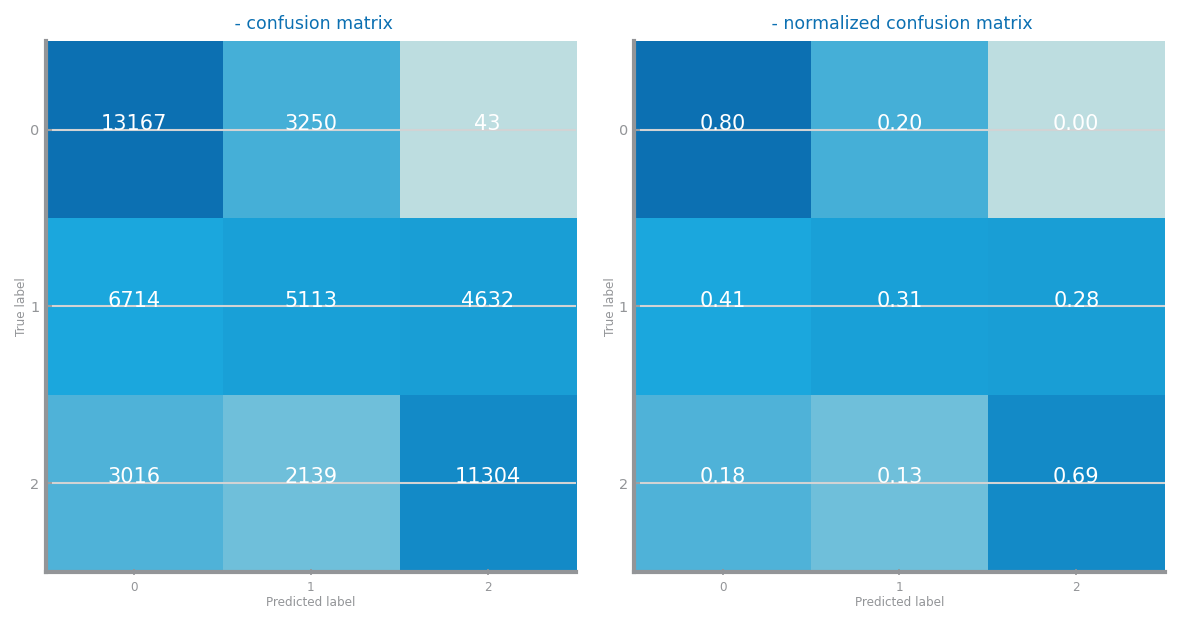

<Figure size 600x450 with 0 Axes>

In [30]:
from ds_charts import plot_evaluation_results, multiple_line_chart, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,0], )
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,1], normalize=True)
plt.tight_layout()
plt.show()
savefig(f'images/{file_tag}_dt_best.png')
show()

1. feature number_inpatient (0.6094208640172044)
2. feature discharge_disposition_id (0.1696725443802692)
3. feature diabetesMed (0.0782433941130358)
4. feature insulin (0.04268391656741664)
5. feature change (0.027756245240315038)
6. feature number_diagnoses (0.022095319976816158)
7. feature encounter_id (0.01586199814491693)
8. feature patient_nbr (0.012571059959932742)
9. feature number_emergency (0.01166933362922507)
10. feature age (0.008586294328747376)
11. feature diag_1 (0.001439029642120715)
12. feature tolbutamide (0.0)
13. feature number_outpatient (0.0)
14. feature gender (0.0)
15. feature race (0.0)
16. feature glimepiride-pioglitazone (0.0)
17. feature metformin-rosiglitazone (0.0)
18. feature num_medications (0.0)
19. feature diag_3 (0.0)
20. feature num_procedures (0.0)
21. feature num_lab_procedures (0.0)
22. feature time_in_hospital (0.0)
23. feature admission_source_id (0.0)
24. feature metformin-pioglitazone (0.0)
25. feature admission_type_id (0.0)
26. feature diag

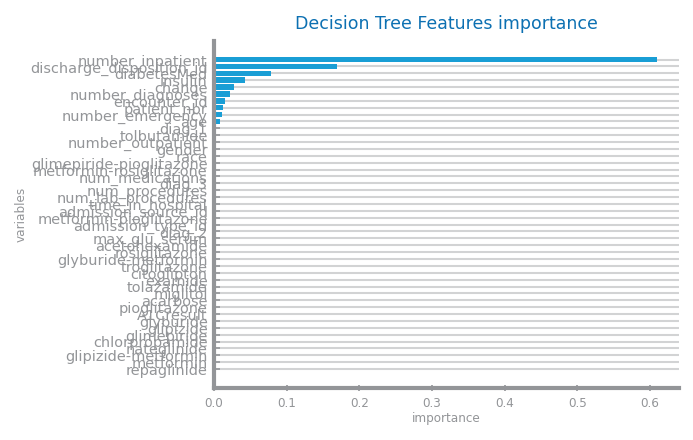

In [31]:
from numpy import argsort, arange
from ds_charts import horizontal_bar_chart
from matplotlib.pyplot import Axes

variables = train.columns
importances = best_model.feature_importances_
indices = argsort(importances)[::-1]
elems = []
imp_values = []
for f in range(len(variables)):
    elems += [variables[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f'{f+1}. feature {elems[f]} ({importances[indices[f]]})')

figure()
horizontal_bar_chart(elems, imp_values, error=None, title='Decision Tree Features importance', xlabel='importance', ylabel='variables')
savefig(f'images/{file_tag}_dt_ranking.png')

## Random Forests

0 0.3 5
0 0.3 10
0 0.3 25
0 0.3 50
0 0.3 75
0 0.3 100
0 0.3 200
0 0.3 300
0 0.3 400
0 0.5 5
0 0.5 10
0 0.5 25
0 0.5 50
0 0.5 75
0 0.5 100
0 0.5 200
0 0.5 300
0 0.5 400
0 0.7 5
0 0.7 10
0 0.7 25
0 0.7 50
0 0.7 75
0 0.7 100
0 0.7 200
0 0.7 300
0 0.7 400
0 1 5
0 1 10
0 1 25
0 1 50
0 1 75
0 1 100
0 1 200
0 1 300
0 1 400
1 0.3 5
1 0.3 10
1 0.3 25
1 0.3 50
1 0.3 75
1 0.3 100
1 0.3 200
1 0.3 300
1 0.3 400
1 0.5 5
1 0.5 10
1 0.5 25
1 0.5 50
1 0.5 75
1 0.5 100
1 0.5 200
1 0.5 300
1 0.5 400
1 0.7 5
1 0.7 10
1 0.7 25
1 0.7 50
1 0.7 75
1 0.7 100
1 0.7 200
1 0.7 300
1 0.7 400
1 1 5
1 1 10
1 1 25
1 1 50
1 1 75
1 1 100
1 1 200
1 1 300
1 1 400
2 0.3 5
2 0.3 10
2 0.3 25
2 0.3 50
2 0.3 75
2 0.3 100
2 0.3 200
2 0.3 300
2 0.3 400
2 0.5 5
2 0.5 10
2 0.5 25
2 0.5 50
2 0.5 75
2 0.5 100
2 0.5 200
2 0.5 300
2 0.5 400
2 0.7 5
2 0.7 10
2 0.7 25
2 0.7 50
2 0.7 75
2 0.7 100
2 0.7 200
2 0.7 300
2 0.7 400
2 1 5
2 1 10
2 1 25
2 1 50
2 1 75
2 1 100
2 1 200
2 1 300
2 1 400


<Figure size 600x450 with 0 Axes>

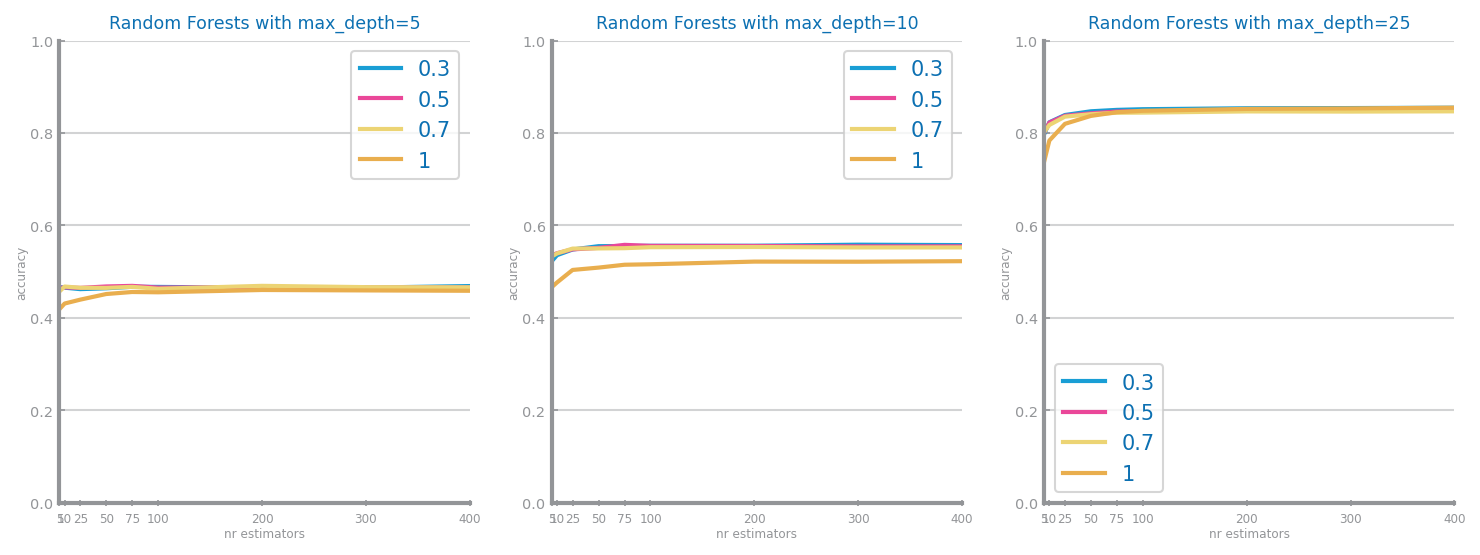

In [40]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.ensemble import RandomForestClassifier
from ds_charts import plot_evaluation_results, multiple_line_chart, horizontal_bar_chart, HEIGHT
from sklearn.metrics import accuracy_score

file_tag = 'drought'
filename = 'datasets/drought'

target = 'readmitted'

for technique in [sampling_technique[1]]:
    file_tag = 'diabetes_'+technique
    filename = 'datasets/'+technique

    train: DataFrame = read_csv(f'{filename}_train.csv')
    trnY: ndarray = train.pop(target).values
    trnX: ndarray = train.values
    labels = unique(trnY)
    labels.sort()

    test: DataFrame = read_csv(f'{filename}_test.csv')
    tstY: ndarray = test.pop(target).values
    tstX: ndarray = test.values

    n_estimators = [5, 10, 25, 50, 75, 100, 200, 300, 400]
    max_depths = [5, 10, 25]
    max_features = [.3, .5, .7, 1]
    best = ('', 0, 0)
    last_best = 0
    best_model = None

    cols = len(max_depths)
    figure()
    fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
    for k in range(len(max_depths)):
        d = max_depths[k]
        values = {}
        for f in max_features:
            yvalues = []
            for n in n_estimators:
                print(k, f, n)
                rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
                rf.fit(trnX, trnY)
                prdY = rf.predict(tstX)
                yvalues.append(accuracy_score(tstY, prdY))
                if yvalues[-1] > last_best:
                    best = (d, f, n)
                    last_best = yvalues[-1]
                    best_model = rf

            values[f] = yvalues
        multiple_line_chart(n_estimators, values, ax=axs[0, k], title=f'Random Forests with max_depth={d}',
                               xlabel='nr estimators', ylabel='accuracy', percentage=True)
    savefig(f'images/{file_tag}_rf_study.png')
    show()

In [41]:
print('Best results with depth=%d, %1.2f features and %d estimators, with accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

Best results with depth=25, 1.00 features and 400 estimators, with accuracy=0.85


<Figure size 600x450 with 0 Axes>

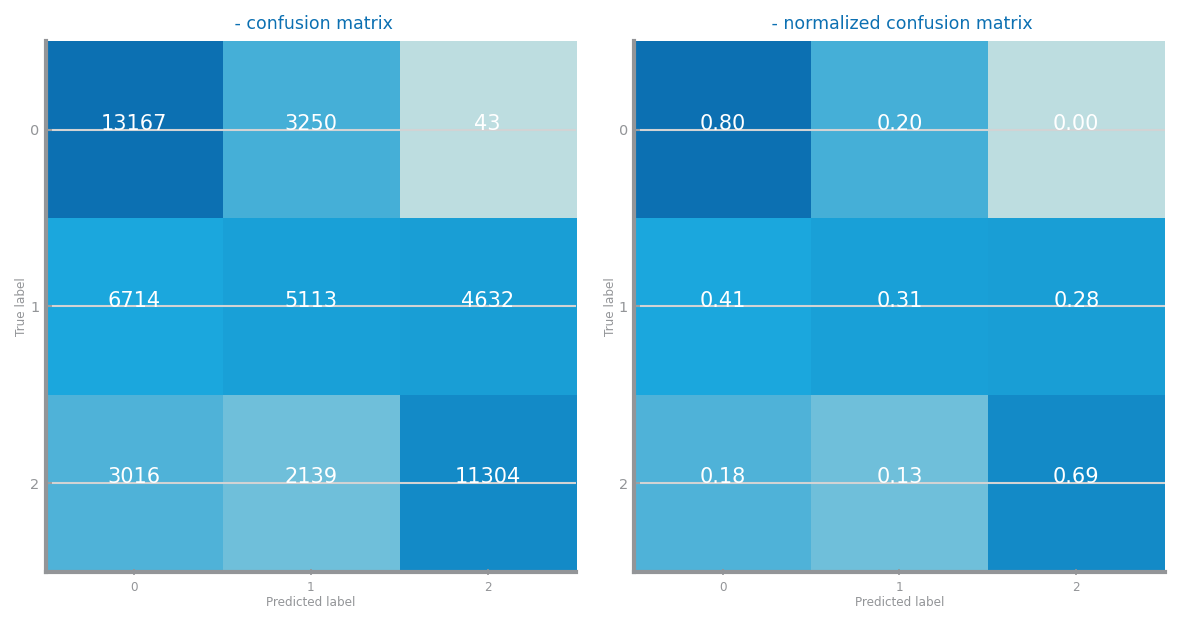

<Figure size 600x450 with 0 Axes>

In [42]:
from ds_charts import plot_evaluation_results, multiple_line_chart, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,0], )
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,1], normalize=True)
plt.tight_layout()
plt.show()
savefig(f'images/{file_tag}_rf_best.png')
show()